# 1. Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.automl import AutoClassifier
from jcopml.utils import save_model, load_model

# 2. Import Dataset

In [30]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
pd.options.display.max_columns = 100

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Information

In [33]:
df.shape

(7043, 20)

In [34]:
df['Churn'] = df.Churn.replace({'Yes':1, 'No': 0})

### Data Description

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [36]:
df.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


### Check Missing Value

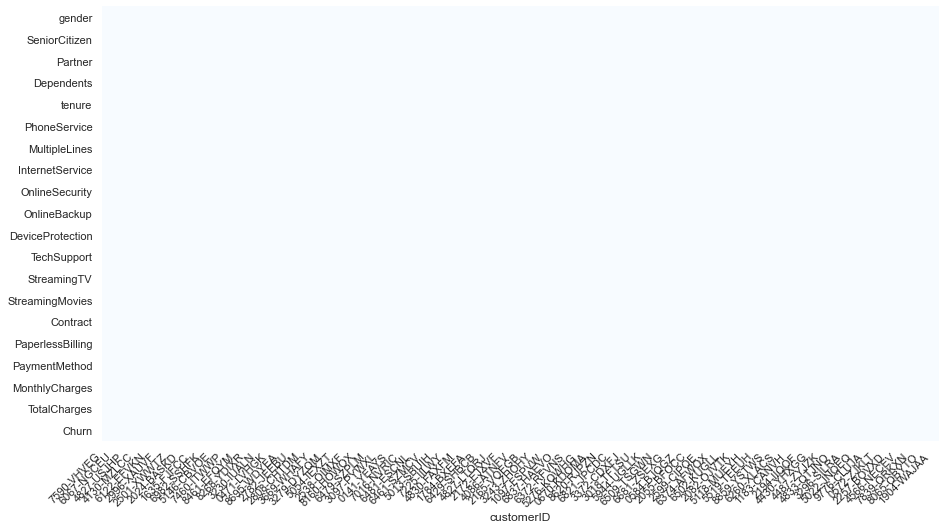

In [37]:
plot_missing_value(df)

```json
After I check the data, The data is not completely clean from missing values. The column of TotalCharge has a missing value that has not been detected
```

In [38]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0


In [39]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

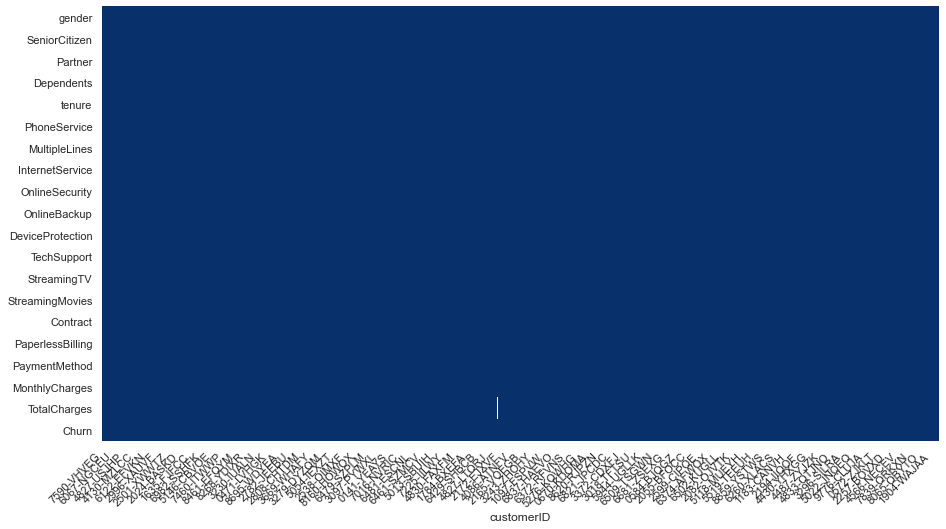

In [40]:
plot_missing_value(df)

```json
Now, the column of TotalCharges have a missing values that will be handled in Pipeline
```

### Plot Multiple Pairwise Bivariate Distributions

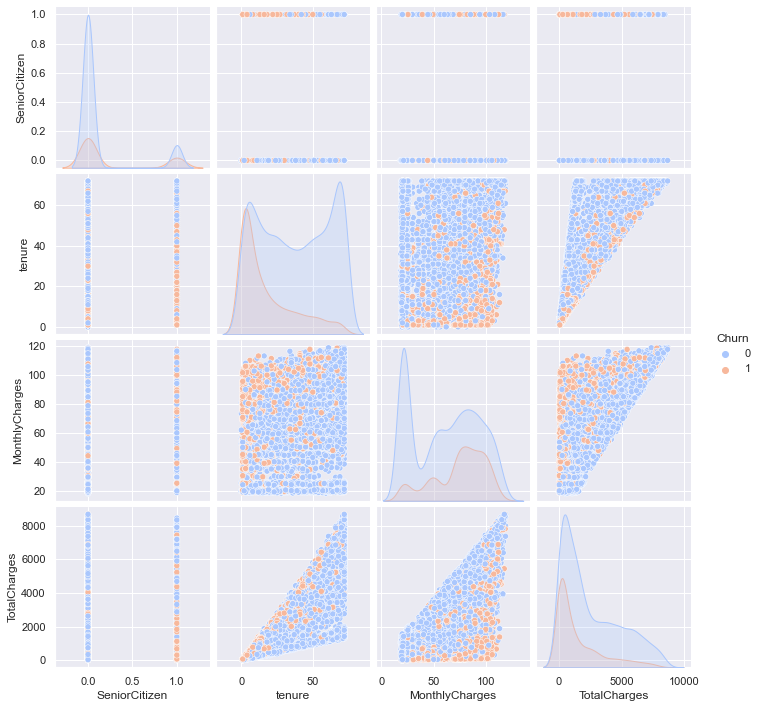

In [41]:
sns.pairplot(df,hue='Churn', palette='coolwarm')

### Check Imbalance Dataset

<AxesSubplot:xlabel='Churn', ylabel='count'>

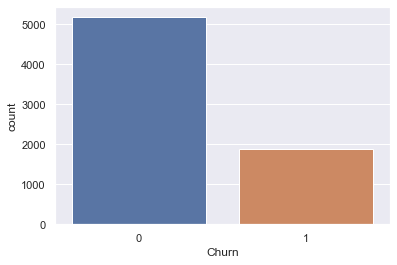

In [42]:
sns.countplot(df.Churn)

In [43]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

`The ratio of the target variable is 0.73:0.265. That means the dataset is slightly balanced. Thus, I'll use 'accuracy' for scoring the model.`

# 3. Dataset Splitting

In [44]:
X = df.drop(columns="Churn")
y = df.Churn

# 4. Modeling

In [45]:
numeric = ['MonthlyCharges','TotalCharges']
categoric= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

In [46]:
model1 = AutoClassifier(num_feature=numeric, cat_feature=categoric)

In [47]:
model1.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 1.037104595424722
algo__fit_intercept       | False

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.8114128505502308
Valid: 0.8081292154774583
Test : 0.8041163946061036


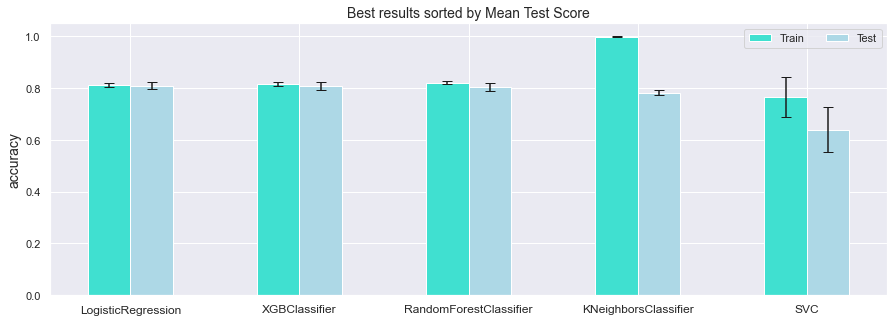

In [48]:
model1.plot_results()

# 5. Features Importance

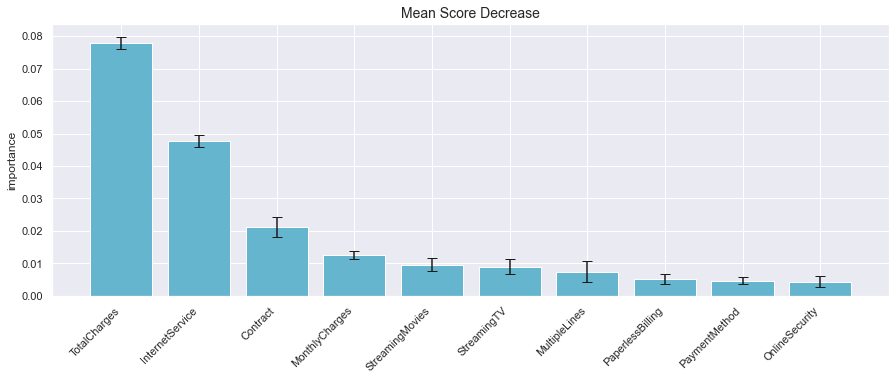

In [49]:
model1.mean_score_decrease()

In [50]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
model2 = AutoClassifier(num_feature= ['MonthlyCharges','TotalCharges'],
                      cat_feature=['InternetService','Contract','StreamingMovies','StreamingTV','MultipleLines', 
                                    'PaperlessBilling','PaymentMethod', 'OnlineSecurity'])

In [53]:
model2.fit(X, y, cv=3, scoring='accuracy', algo=['logreg'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s


================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 1.8037506431281878
algo__fit_intercept       | True

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.8092829250976216
Valid: 0.8086616968406105
Test : 0.7998580553584103


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.7s finished


# 6. Polynomial Features

In [54]:
model1.fit(X, y, cv=3, scoring='accuracy', algo=['xgb'], poly=True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


[06:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.5782191684113333
algo__gamma               | 3
algo__learning_rate       | 0.18830411164464736
algo__max_depth           | 4
algo__n_estimators        | 115
algo__reg_alpha           | 8.005866020696468
algo__reg_lambda          | 0.11619873314872936
algo__subsample           | 0.461478236470623

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_

# 7. Evaluation

In [55]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_pr_curve, plot_roc_curve

In [56]:
X_train = model1.X_train
y_train = model1.y_train
X_test = model1.X_test
y_test = model1.y_test

## 7.1. Classification Report

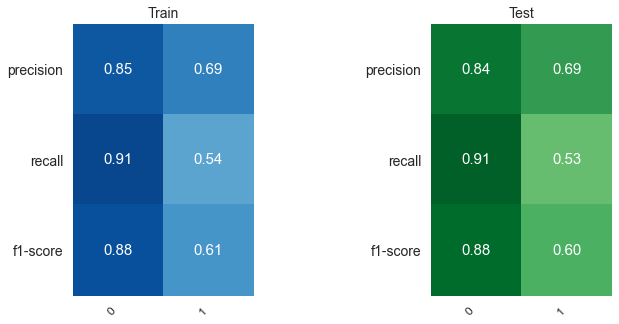

In [57]:
plot_classification_report(X_train, y_train, X_test, y_test, model1)

In [58]:
plot_classification_report(X_train, y_train, X_test, y_test, model1, report=True)

Train report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.69      0.54      0.61      1495

    accuracy                           0.82      5634
   macro avg       0.77      0.73      0.74      5634
weighted avg       0.81      0.82      0.81      5634


Test report
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## 7.2. Precision vs Recall

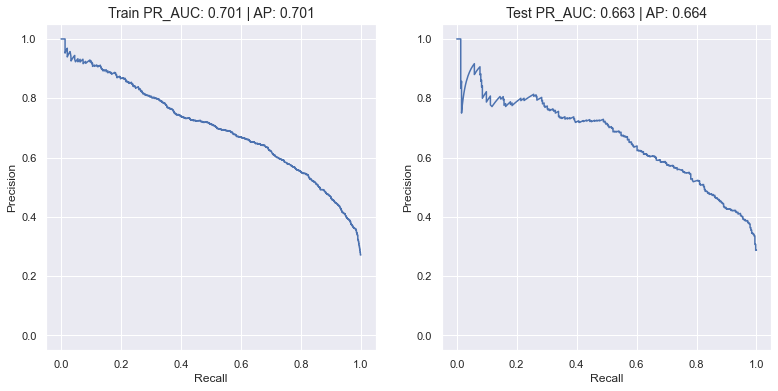

In [59]:
plot_pr_curve(X_train, y_train, X_test, y_test, model1.model) 

## 7.3. ROC AUC Curve

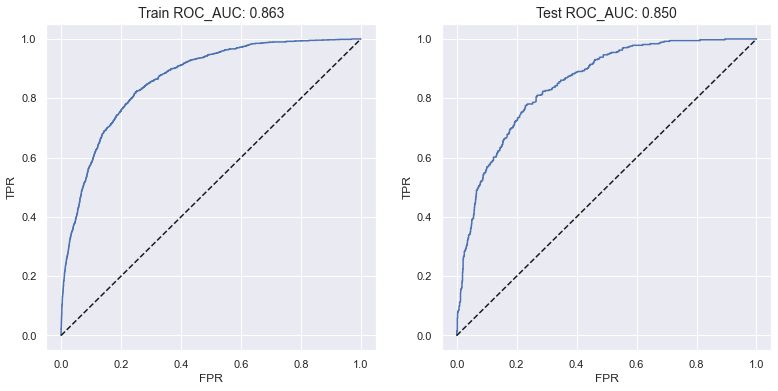

In [60]:
plot_roc_curve(X_train, y_train, X_test, y_test, model1.model) 

## 7.4. Confusion Matrix

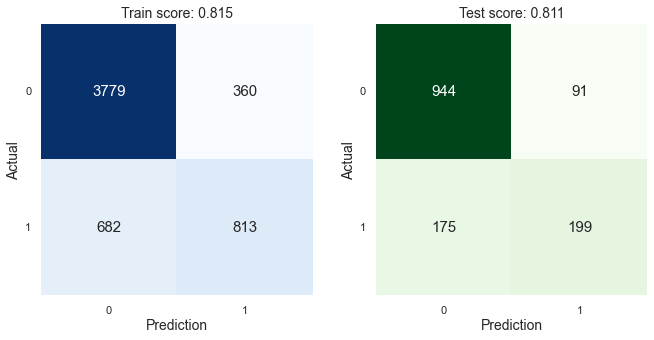

In [61]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model1.model)

# 8. Save Model

In [62]:
model1.save(fname= 'Telco_Customer_Churn_AutoML_Baseline.pkl')

Model is pickled as model/Telco_Customer_Churn_AutoML_Baseline.pkl
